In [8]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import Input

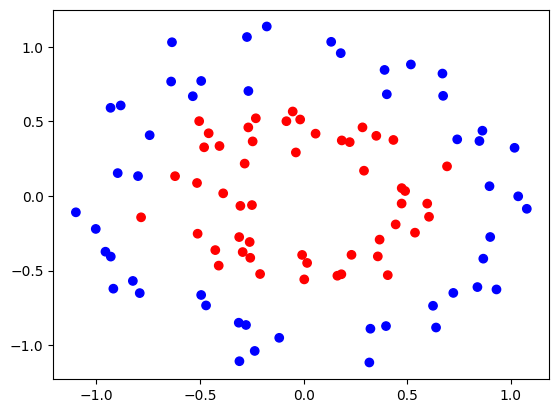

In [9]:
X, Y = datasets.make_circles(100, noise=0.1, factor=0.5)

color = ['blue' if k == 0 else 'red' for k in Y]
plt.scatter(X[:, 0], X[:, 1], c=color)
plt.savefig('circulos.svg')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalização (padronização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [12]:
def run_neural_net(x, w0, b0, b1, w1):
    # camada escondida com 4 neurônios (tanh)
    v0 = np.dot(x, w0.T) + b0
    y0 = tanh(v0)

    # camada de saída (sigmoide)
    v1 = np.dot(y0, w1) + b1
    y1 = sigmoid(v1)

    return 1 if y1 > 0.5 else 0


In [13]:
def neural_net(x, d, w0, b0, b1, w1):
    # forward
    v0 = np.dot(x, w0.T) + b0
    y0 = tanh(v0)

    v1 = np.dot(y0, w1) + b1
    y1 = sigmoid(v1)

    e = y1 - d
    L = 1/2 * (e ** 2)  # MSE

    # # Cross-entropy
    # eps = 1e-8  # para evitar log(0)
    # L = - (d * np.log(y1 + eps) + (1 - d) * np.log(1 - y1 + eps))

    # backward
    grad_w0 = np.zeros(w0.shape)
    grad_w1 = np.zeros(w1.shape)
    grad_b0 = np.zeros(b0.shape)
    grad_b1 = np.zeros(b1.shape)

    # derivadas
    grad_y1 = e
    grad_v1 = grad_y1 * y1 * (1 - y1)

    # Se usar cross-entropy + sigmoid, grad_v1 = y1 - d
    # grad_v1 = y1 - d

    grad_w1 = grad_v1 * y0
    grad_b1 = grad_v1

    grad_y0 = grad_v1 * w1
    grad_v0 = grad_y0 * (1 - np.tanh(v0) ** 2)  # derivada tanh

    grad_w0 = np.outer(grad_v0, x)
    grad_b0 = grad_v0

    return grad_w0, grad_b0, grad_w1, grad_b1, L

In [ ]:
def main():
    # 1. Inicialização dos parâmetros da rede manual
    np.random.seed(42)
    w0 = np.random.rand(4, 2)  # Pesos da camada escondida (4 neurônios, 2 entradas)
    w1 = np.random.rand(4)     # Pesos da camada de saída
    b0 = np.random.rand(4)     # Bias da camada escondida
    b1 = np.random.rand(1)     # Bias da saída

    taxa = 0.05  # Taxa de aprendizado

    print('--- Rede Neural Manual ---')
    # 2. Avaliação inicial (antes do treinamento)
    acc = 0
    for i in range(len(X_train)):
        out = run_neural_net(X_train[i], w0, b0, b1, w1)
        if out == Y_train[i]:
            acc += 1
    print(f'Acurácia inicial (treino): {acc}/{len(X_train)}')

    # 3. Treinamento (gradiente descendente)
    for i in range(5000):
        loss = 0
        grad_w0 = np.zeros(w0.shape)
        grad_w1 = np.zeros(w1.shape)
        grad_b0 = np.zeros(b0.shape)
        grad_b1 = np.zeros(b1.shape)

        for k in range(len(X_train)):
            g_w0, g_b0, g_w1, g_b1, L = neural_net(X_train[k], Y_train[k], w0, b0, b1, w1)
            grad_w0 += g_w0
            grad_w1 += g_w1
            grad_b0 += g_b0
            grad_b1 += g_b1
            loss += L

        w0 -= taxa * grad_w0
        w1 -= taxa * grad_w1
        b0 -= taxa * grad_b0
        b1 -= taxa * grad_b1

        if i % 1000 == 0:
            print(f'Iteração {i}, Loss: {loss:.4f}')

    # 4. Avaliação após treinamento (treino)
    acc = 0
    for i in range(len(X_train)):
        out = run_neural_net(X_train[i], w0, b0, b1, w1)
        if out == Y_train[i]:
            acc += 1
    print(f'Acurácia após treinamento (treino): {acc}/{len(X_train)}')

    # 5. Avaliação no conjunto de teste (rede manual)
    acc_test = 0
    for i in range(len(X_test)):
        out = run_neural_net(X_test[i], w0, b0, b1, w1)
        if out == Y_test[i]:
            acc_test += 1
    print(f'Acurácia no teste (rede manual): {acc_test}/{len(X_test)}')

    print('\n--- Rede Neural com Keras ---')
    # 6. Construção do modelo Keras
    model = Sequential()
    model.add(Dense(8, input_dim=2, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=taxa)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    # 7. Treinamento do modelo Keras
    model.fit(X_train, Y_train, epochs=200, verbose=False, batch_size=5)

    # 8. Avaliação do modelo Keras
    acc_train = model.evaluate(X_train, Y_train, verbose=0)
    acc_test = model.evaluate(X_test, Y_test, verbose=0)
    print(f'Acurácia final (Keras) treino: {acc_train}')
    print(f'Acurácia final (Keras) teste: {acc_test}')

main()

47 acurácia antes do treinamento (treino)
0 [10.9664565]
1000 [0.35453448]
2000 [0.22903557]
3000 [0.1730541]
4000 [0.13777718]
acc após treinamento (treino): 80
acc no teste (rede manual): 13 / 20


/Users/larissaiuki/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Acurácia final (Keras) treino: [0.005098950117826462, 1.0]
Acurácia final (Keras) teste: [0.4953939914703369, 0.800000011920929]
